In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("beavers.csv")
data.head()

,Unnamed: 0,day,time,temp,activ
0,1,346,840,36.33,0
1,2,346,850,36.34,0
2,3,346,900,36.35,0
3,4,346,910,36.42,0
4,5,346,920,36.55,0


In [3]:
data.isnull().any()

Unnamed: 0    False
day           False
time          False
temp          False
activ         False
dtype: bool

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114.0,57.500000,33.052988,1.00,29.25,57.50,85.7500,114.00
day,114.0,346.201754,0.403082,346.00,346.00,346.00,346.0000,347.00
time,114.0,1312.017544,701.851130,0.00,932.50,1415.00,1887.5000,2350.00
temp,114.0,36.862193,0.193422,36.33,36.76,36.87,36.9575,37.53
activ,114.0,0.052632,0.224283,0.00,0.00,0.00,0.0000,1.00


In [15]:
data_copy = data.copy(deep = True)
data_copy[['Unnamed: 0','day','time','temp','activ']] = data_copy[['Unnamed: 0','day','time','temp','activ']].replace(0,np.NaN)
data_copy.isnull().sum()

Unnamed: 0      0
day             0
time            1
temp            0
activ         108
dtype: int64

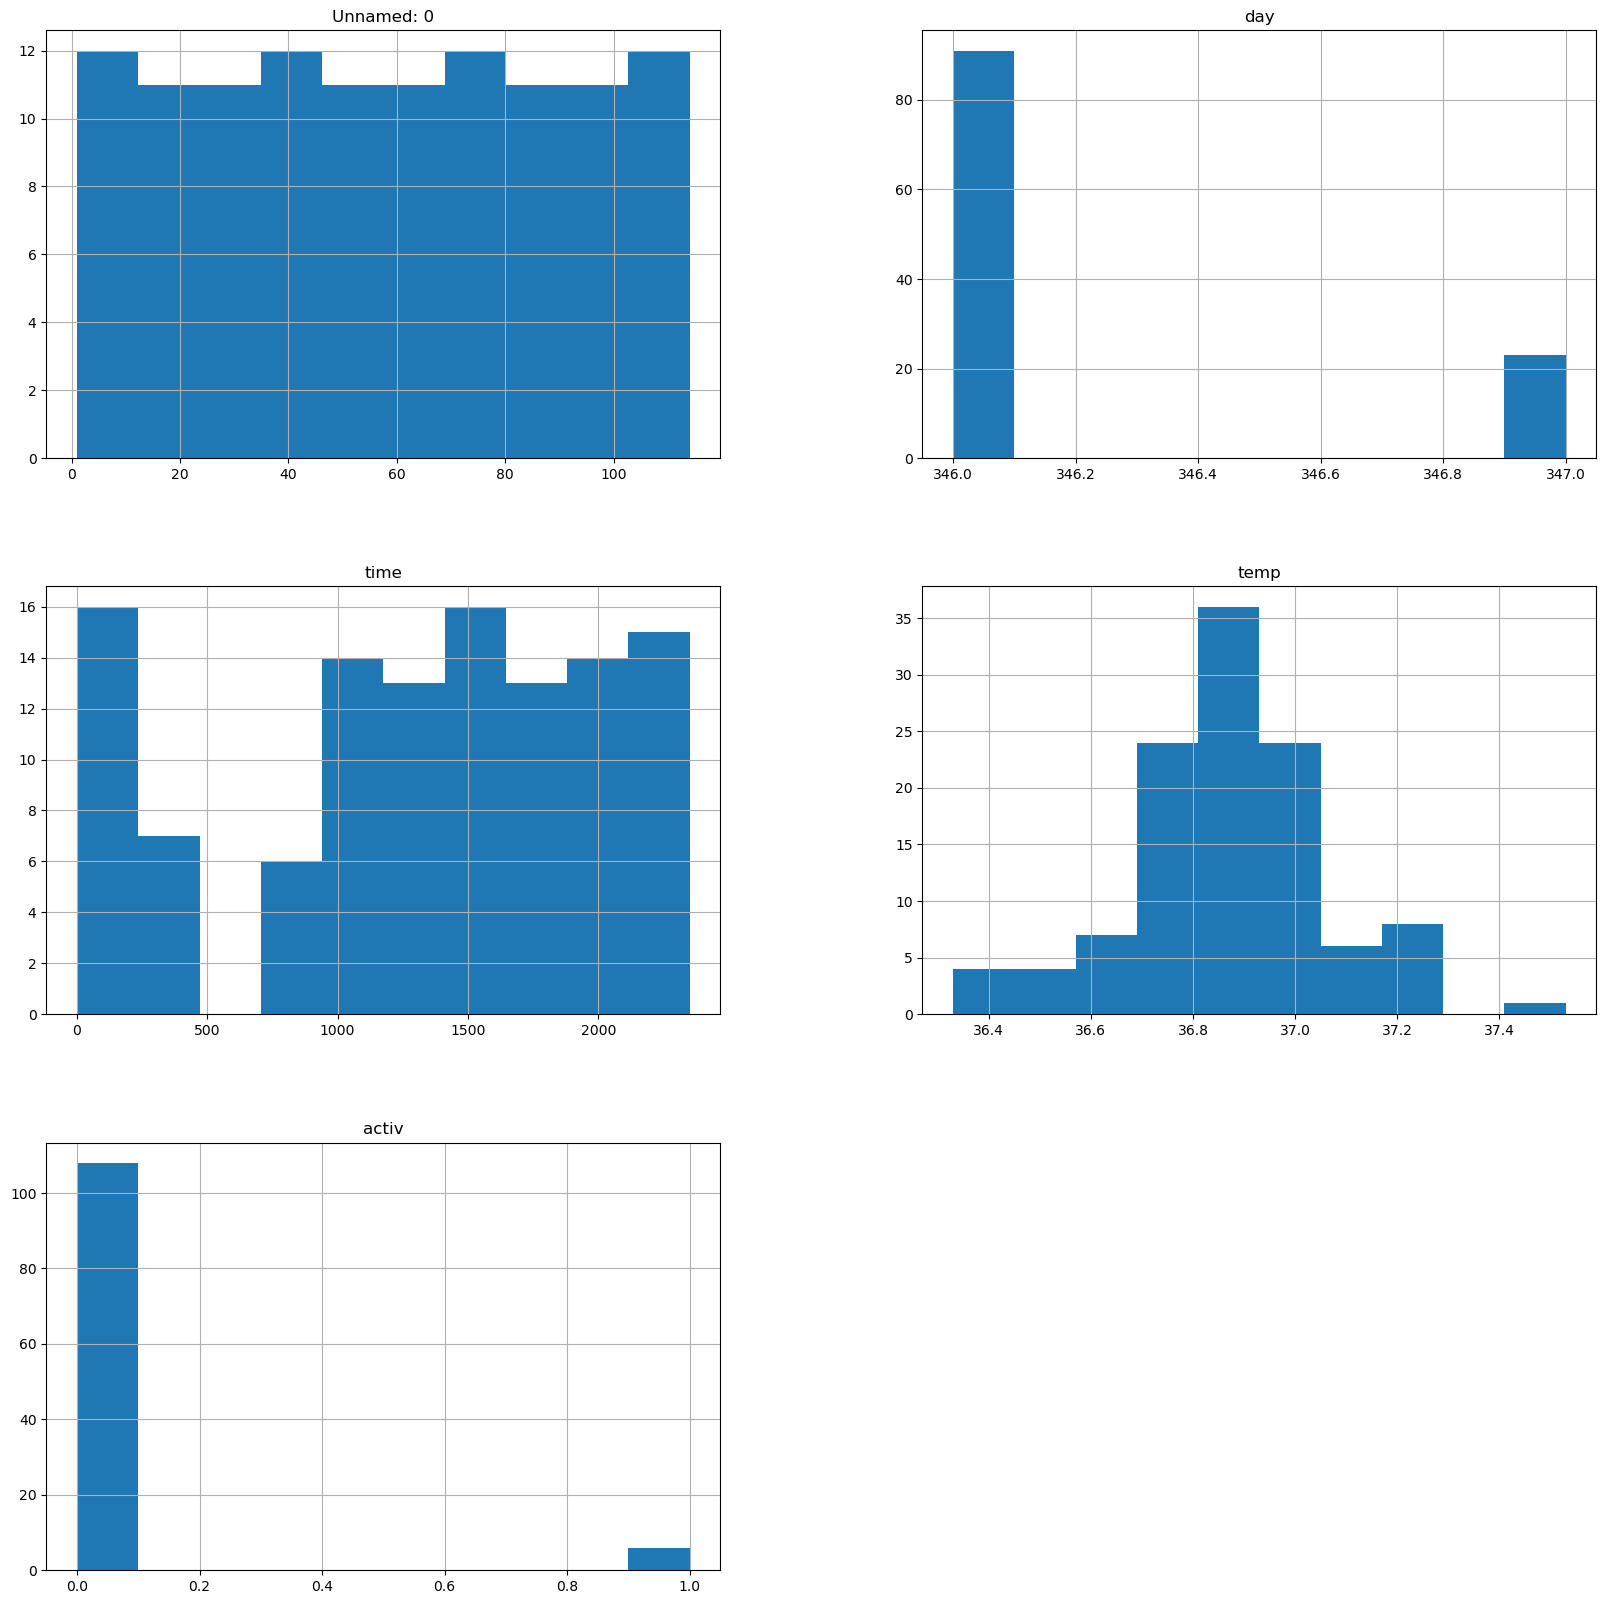

In [16]:
p = data.hist(figsize = (20,20))

In [17]:
data_copy['Unnamed: 0'].fillna(data_copy['Unnamed: 0'].mean(), inplace = True)
data_copy['day'].fillna(data_copy['day'].mean(), inplace = True)
data_copy['time'].fillna(data_copy['time'].median(), inplace = True)
data_copy['temp'].fillna(data_copy['temp'].median(), inplace = True)
data_copy['activ'].fillna(data_copy['activ'].median(), inplace = True)

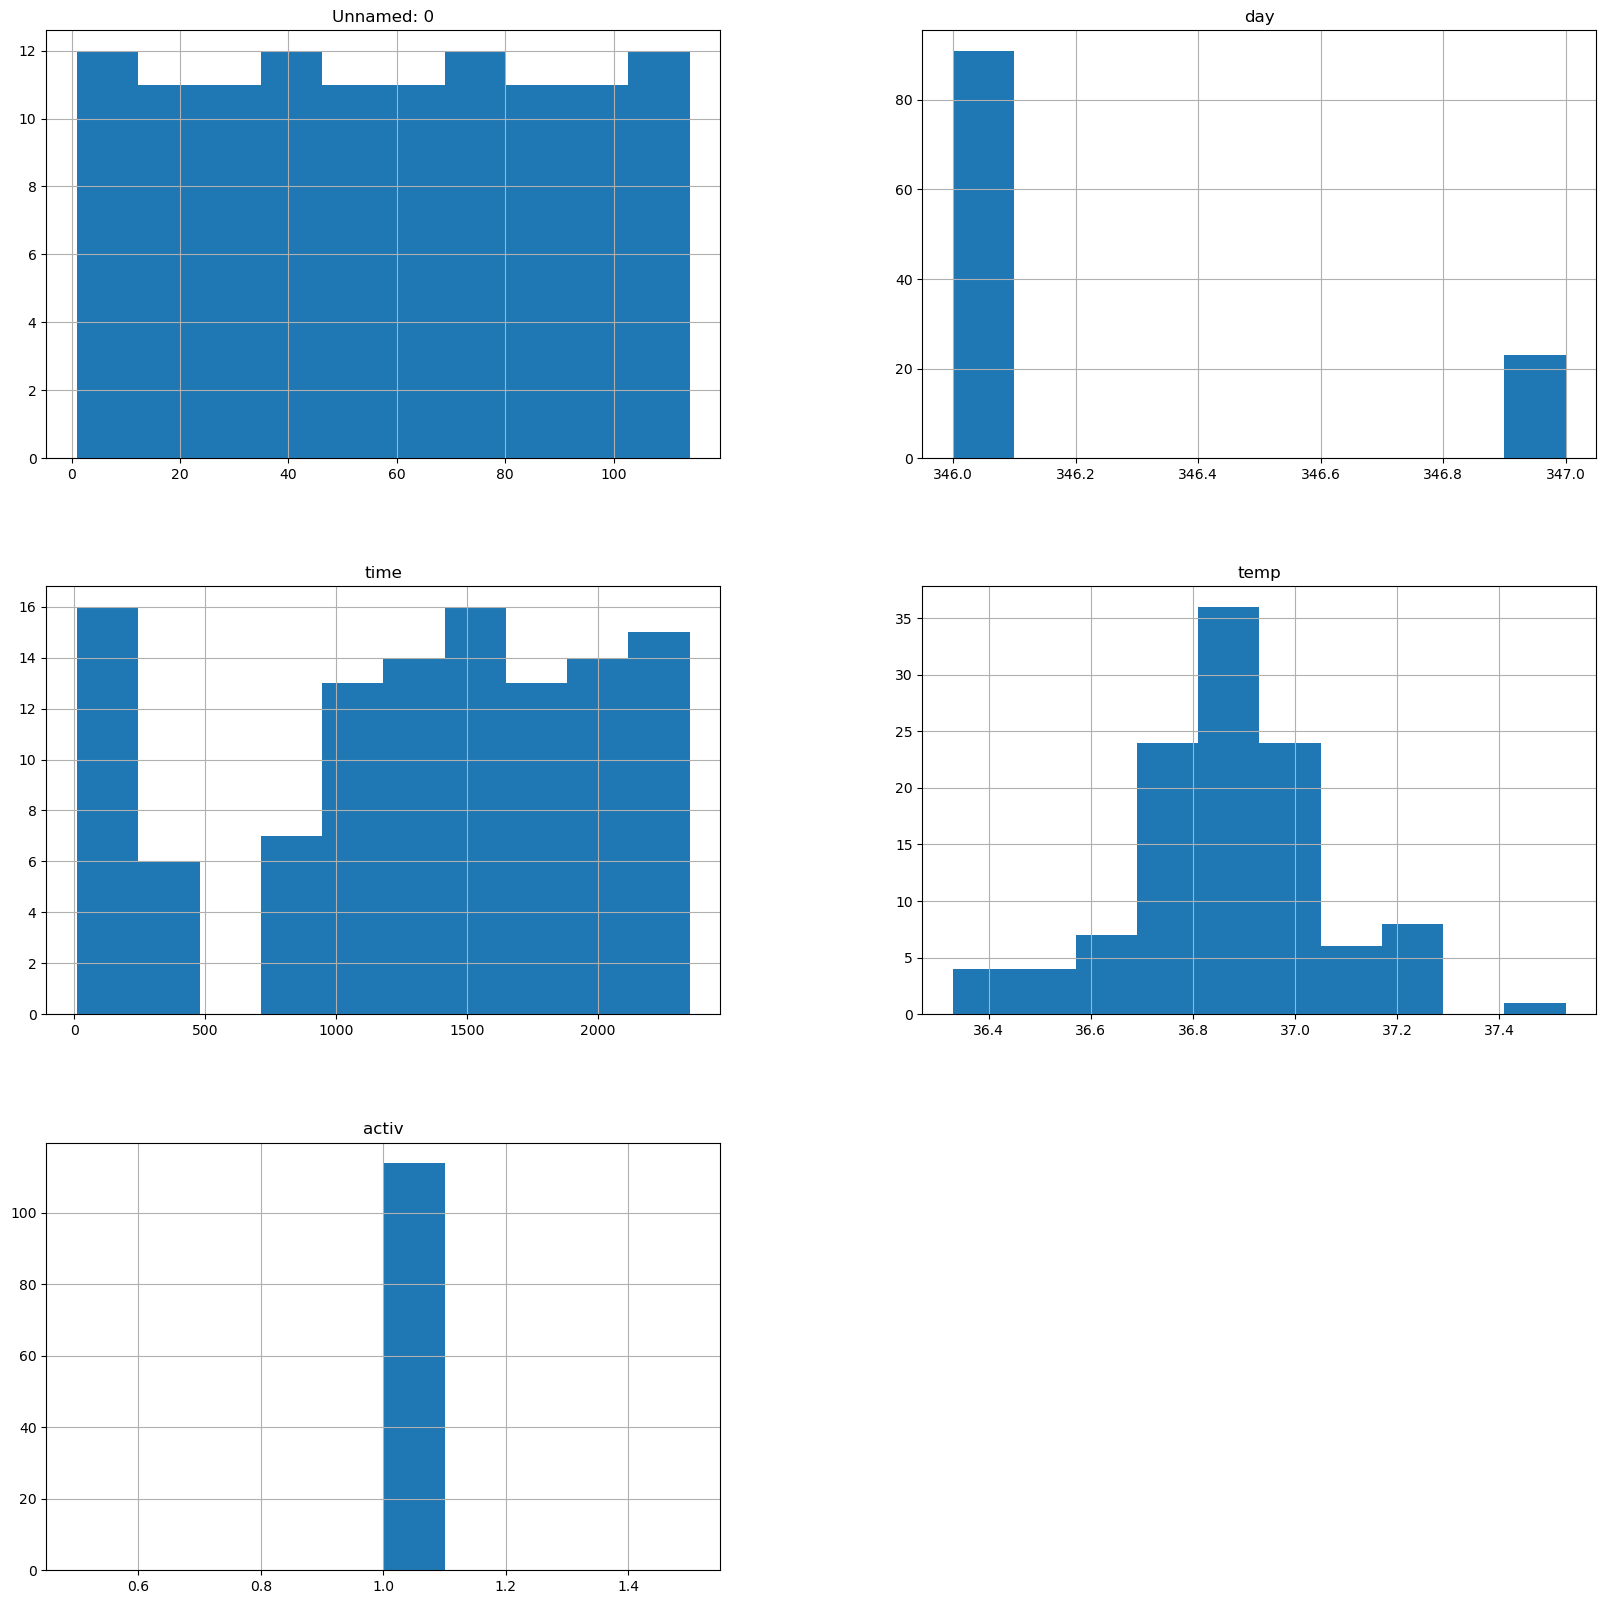

In [18]:
p = data_copy.hist(figsize = (20,20))

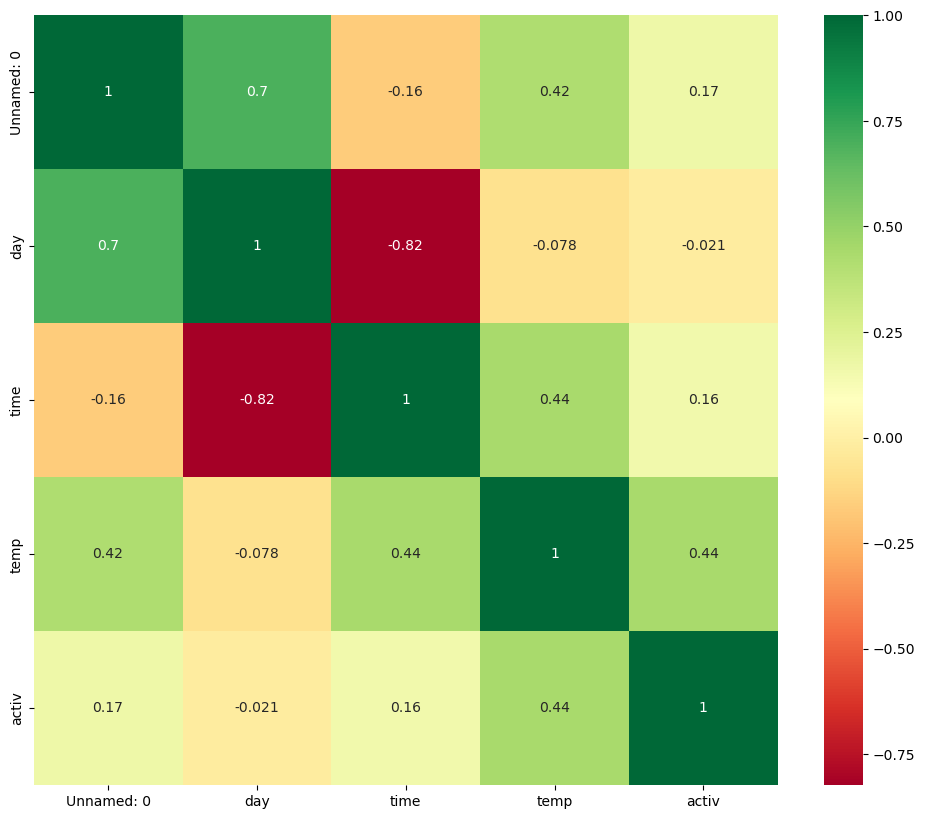

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

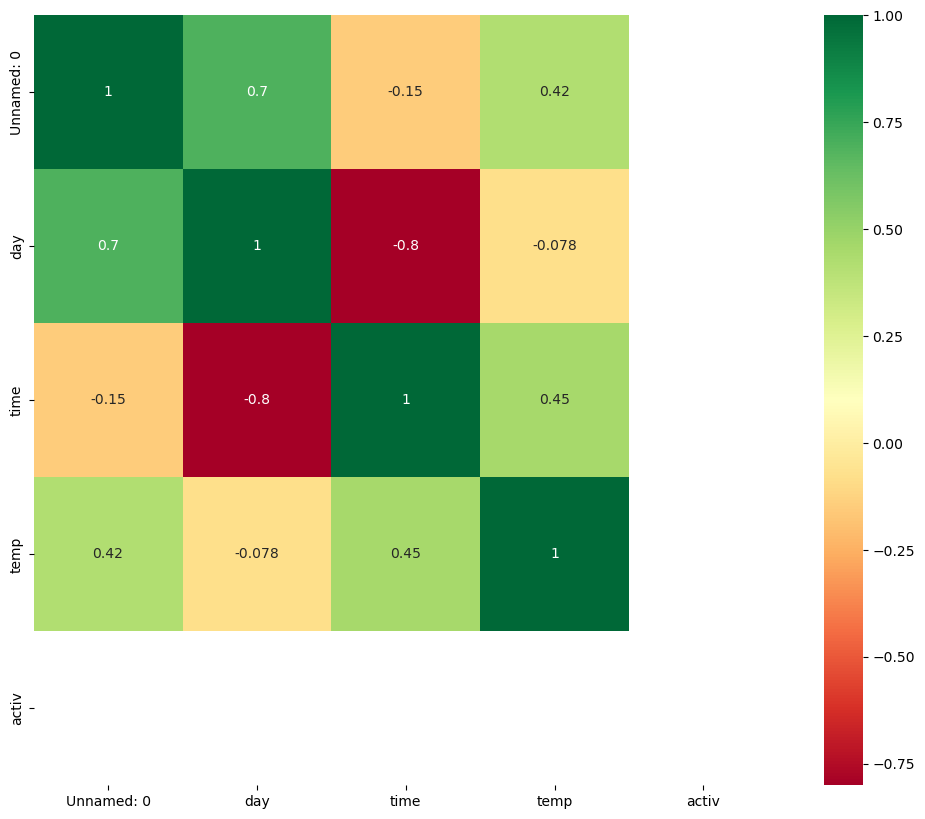

In [26]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn') 

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["activ"], axis =1),),columns=['Unnamed: 0','day','time','temp'])

In [36]:
X.head()

,Unnamed: 0,day,time,temp
0,-1.716923,-0.50274,-0.704343,-2.763612
1,-1.686535,-0.50274,-0.689804,-2.711683
2,-1.656147,-0.50274,-0.617113,-2.659755
3,-1.625759,-0.50274,-0.602575,-2.296253
4,-1.595371,-0.50274,-0.588036,-1.621179


In [37]:
y =data_copy.activ

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42, stratify=y)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [40]:
max_test_score =max(test_scores)

In [41]:
test_score_index = [i for i, v in enumerate(test_scores) if v== max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 100.0 % and k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


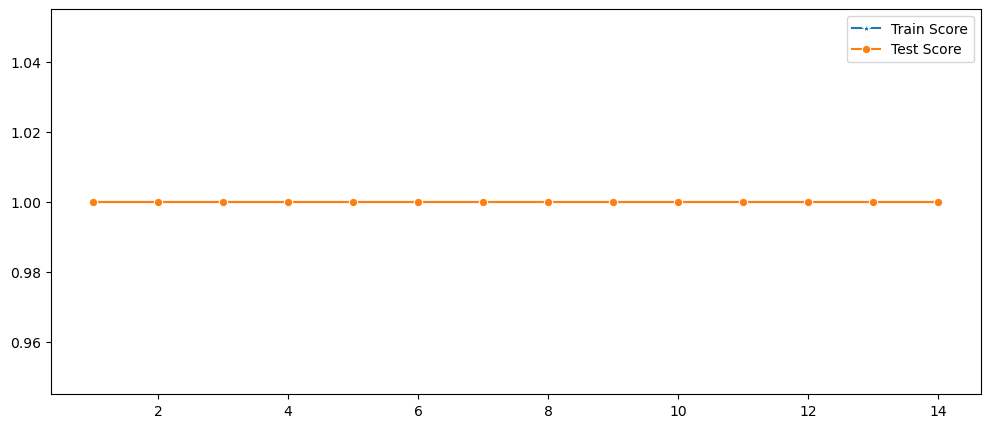

In [42]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [43]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 23.52222222222222, 'Predicted label')

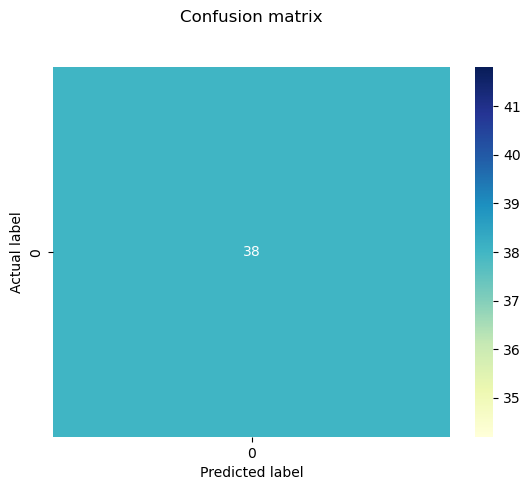

In [48]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results



model_evaluation(y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,1.0,1.0,1.0,1.0,1.0


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [52]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,-1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
